# Search stocks

In [1]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
from pandas import DataFrame
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [3]:
from repo.etf import ETF
from repo.germ_stocks import GermStocks
from repo.dax_stocks import DaxStocks
from repo.nasdaq import NasdaqStocks
from repo.futures import Futures
repo = Futures()
symbols = repo.get_tickers()

ma_count = 21
ma_count1 = ma_count * 5

data = repo.get_df(dt.datetime(2019,1,1))
data.tail()


[*********************100%***********************]  48 of 48 completed

2 Failed downloads:
- GF=F : No data found, symbol may be delisted
- FDAX.EX: No data found for this date range, symbol may be delisted


,6E=F,AUDUSD=X,BZ=F,CAD=X,CC=F,CHF=X,CL=F,CT=F,ES=F,FDAX.EX,...,ZL=F,ZN=F,ZO=F,ZR=F,ZS=F,ZT=F,ZW=F,^N225,^STOXX50E,^VIX
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-08 00:00:00,1.01785,0.684900,107.019997,1.29660,2269.0,0.97380,104.790001,102.610001,3901.25,NaN,...,64.070000,117.625000,686.75,1620.000,1630.25,104.671875,879.25,26517.189453,3506.550049,24.639999
2022-07-11 00:00:00,1.00665,0.684580,107.099998,1.29470,2324.0,0.97773,104.089996,102.440002,3856.75,NaN,...,65.209999,118.375000,686.25,1630.500,1641.00,104.800781,843.75,26812.300781,3471.689941,26.170000
2022-07-12 00:00:00,1.00480,0.674332,99.489998,1.29948,2305.0,0.98274,95.839996,98.440002,3823.75,NaN,...,61.410000,118.656250,654.00,1620.500,1592.75,104.863281,801.50,26336.660156,3487.050049,27.290001
2022-07-13 00:00:00,1.00660,0.674700,99.570000,1.30313,2254.0,0.98187,96.300003,95.410004,3804.50,NaN,...,60.209999,118.921875,654.25,1621.500,1588.25,104.703125,798.25,26478.769531,3453.969971,26.820000
2022-07-14 00:00:00,1.00680,0.673230,99.489998,1.30009,2250.0,0.98080,96.230003,92.459999,3805.50,NaN,...,55.830002,118.484375,446.25,16.395,1341.75,104.699219,795.00,26643.390625,3396.610107,26.400000


In [4]:
from service.sma import SMA
sma = SMA()
lead_comps = sma.get_crossed(data)


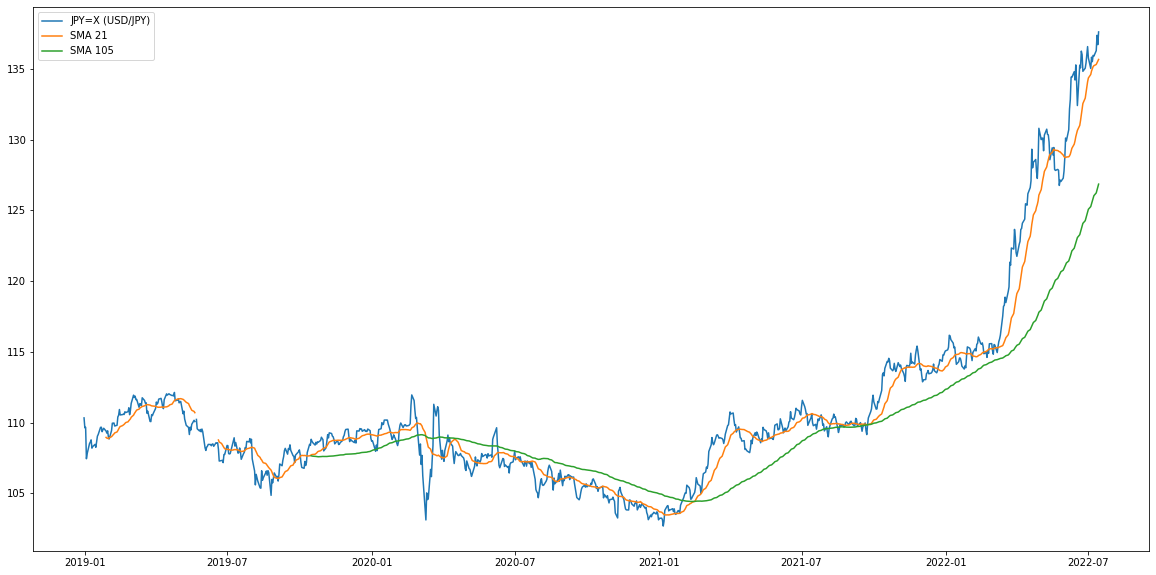

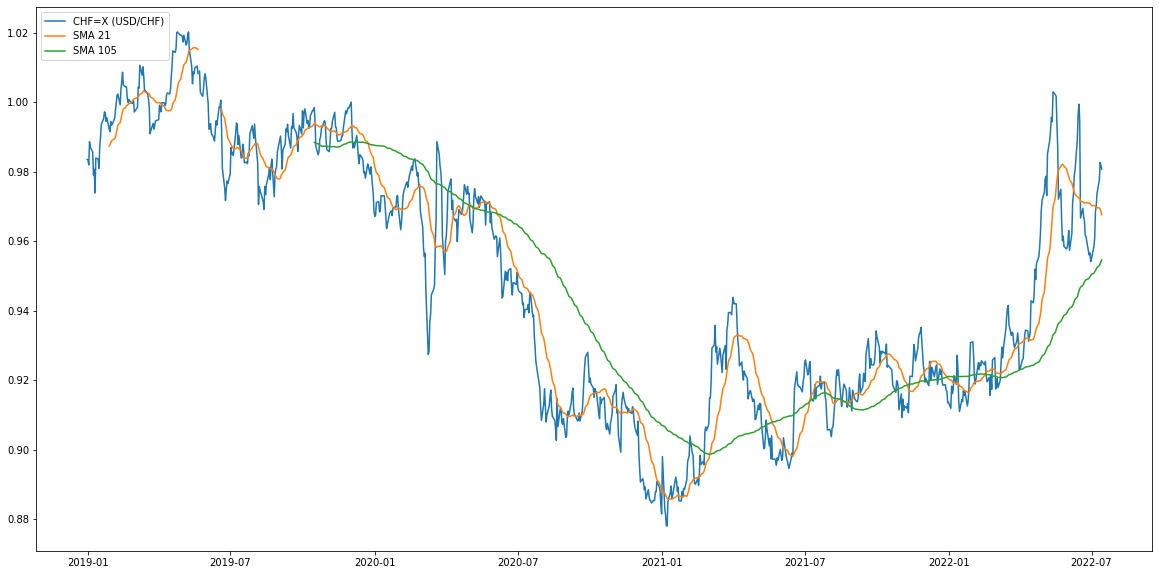

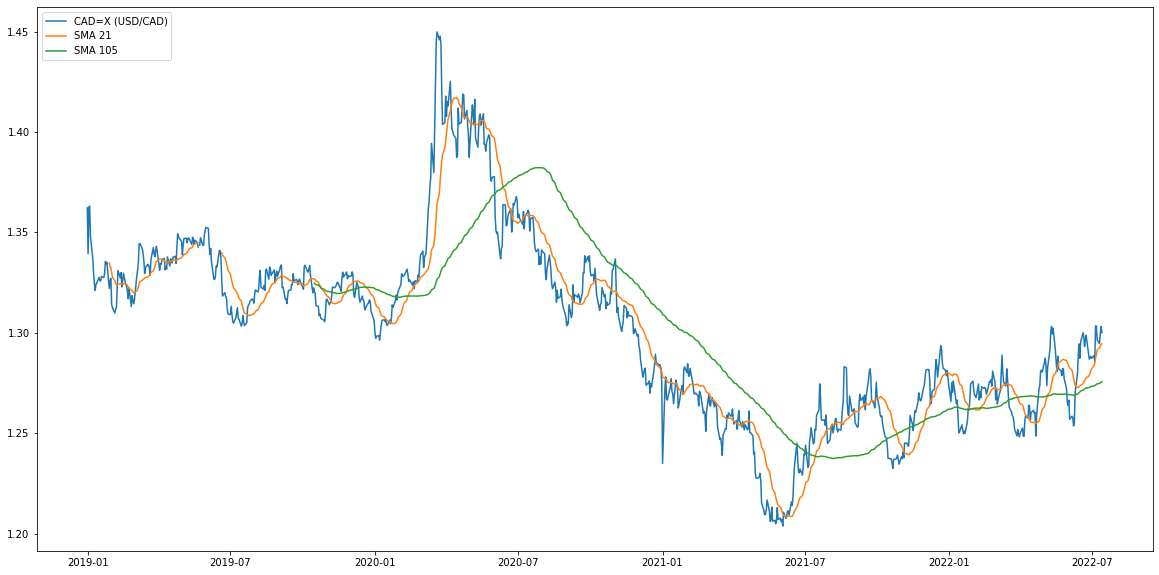

In [5]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=f'{quote} ({repo.get_info(quote)})');
    plt.plot(sma.sma_df[quote], label = f'SMA {sma.sma}');
    plt.plot(sma.sma_week_df[quote], label = f'SMA {sma.sma1}');
    plt.legend(loc=2);